# **Machine Learning Project Report - Haris Yafie**

Di tengah melimpahnya jumlah film yang tersedia di platform streaming digital, pengguna sering mengalami **kesulitan dalam memilih film** yang sesuai dengan selera mereka. Untuk menjawab tantangan tersebut, proyek ini membangun sebuah **Sistem Rekomendasi Film** berbasis machine learning yang bertujuan memberikan saran film yang **lebih personal dan relevan**. Proyek ini untuk pembelajaran saya dalam kursus Dicoding Machine Learning Terapan. Proyek ini adalah proyek sistem rekomendasi film. Data diperoleh dari Kaggle.com yang berjudul The Movie Dataset.

Proyek ini mengeksplorasi dua pendekatan utama:

1. **Content-Based Filtering (CBF)**  
   Memberikan rekomendasi berdasarkan kemiripan konten antar film, seperti judul, genre, dan kata kunci. Cocok digunakan untuk user baru yang belum banyak memiliki histori rating (*cold-start problem*).

2. **Collaborative Filtering (CF)**  
   Memberikan rekomendasi berdasarkan pola interaksi user terhadap film, khususnya dari data rating. Terdapat dua model yang dibangun:
   - **Memory-Based CF**: menggunakan cosine similarity antar item
   - **RecommenderNet**: model neural network sederhana berbasis embedding

**Project Highlight**
- Melakukan **preprocessing dan rekayasa fitur** dari data metadata film, rating pengguna, dan keywords.
- Membangun beberapa model rekomendasi dan mengevaluasi performanya menggunakan **RMSE** serta interpretasi kualitas rekomendasi.
- Menunjukkan bahwa **CBF efektif dalam menemukan film yang mirip secara tema**, sedangkan **Memory-Based CF unggul dalam memberikan rekomendasi yang personalized**.
- **RecommenderNet** memiliki potensi untuk dikembangkan lebih lanjut, meskipun pada kondisi saat ini performanya masih perlu ditingkatkan.


ID Dicoding: harisyafie

Email: yafie345@gmail.com

# **Recommendation System: Movie**
Di era digital saat ini, pengguna layanan streaming film seperti Netflix, Disney+, maupun platform lokal dihadapkan pada ribuan pilihan film yang tersedia. Jumlah film yang sangat banyak ini justru menjadi tantangan baru — pengguna sering mengalami kebingungan dalam memilih film yang sesuai dengan selera mereka.

Sistem rekomendasi hadir sebagai solusi untuk membantu pengguna menemukan film yang relevan, menarik, dan sesuai dengan preferensi personal. Selain meningkatkan pengalaman pengguna (user experience), sistem ini juga dapat meningkatkan tingkat keterlibatan pengguna (user engagement) terhadap platform.

Proyek ini memiliki dua manfaat utama. Pertama, dari sisi pengguna, sistem ini bertujuan memberikan kemudahan dalam pemilihan film yang sesuai dengan karakteristik atau histori interaksi mereka. Kedua, dari sisi pengembang (penulis), proyek ini menjadi ajang pembelajaran untuk memahami dan menerapkan berbagai pendekatan sistem rekomendasi dalam konteks nyata.

Beberapa pendekatan yang digunakan dalam sistem rekomendasi ini mengacu pada literatur yang telah ada, seperti content-based filtering, collaborative filtering, dan hybrid approach

## **Problem Statement**
Pengguna platform streaming film sering kali mengalami kesulitan dalam memilih film yang sesuai dengan preferensi pribadi mereka. Hal ini disebabkan oleh banyaknya pilihan film yang tersedia dan kurangnya sistem yang dapat secara otomatis menyesuaikan rekomendasi berdasarkan karakteristik atau histori pengguna.



## **Initialization**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## **Data Understanding**

Sebelum membangun model prediksi, penting untuk memahami terlebih dahulu karakteristik dataset yang digunakan. Pada tahap *data understanding*, dilakukan eksplorasi terhadap struktur data, kondisi kualitas data, serta pemahaman terhadap fitur-fitur yang tersedia.

Langkah ini bertujuan untuk memastikan bahwa data yang digunakan benar-benar representatif, relevan, dan siap untuk diproses lebih lanjut dalam tahap modeling. Selain itu, melalui pemahaman awal terhadap data, potensi masalah seperti missing values, atau duplikasi dapat diidentifikasi dan ditangani dengan tepat.


### **Data Collecting**
Download the dataset dari Google Drive saya. Data dikumpulkan dari website Kaggle [The Movie Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data). Penggunaan Google Drive mempermudah akses data

In [ ]:
# Download Movies Metadata
!gdown 1x6Q9KfOfi-EHohGvzEO7JBt2Qvh0hVEf

# Download Rating Data
!gdown 14wZJmzAig9Z5RPB9sTp_eld9PEYNVlH2

# Download ID Link Data
!gdown 1RjGSkB05MxQmfwSIajp5VXP4RLgGkSAu

# Download Keywords Data
!gdown 1pFucaeCb7intIn9-9WOcnNVRPg3hhw46

Downloading...
From: https://drive.google.com/uc?id=1x6Q9KfOfi-EHohGvzEO7JBt2Qvh0hVEf
To: /content/movies_metadata.csv
100% 34.4M/34.4M [00:00<00:00, 43.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=14wZJmzAig9Z5RPB9sTp_eld9PEYNVlH2
To: /content/ratings_small.csv
100% 2.44M/2.44M [00:00<00:00, 41.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RjGSkB05MxQmfwSIajp5VXP4RLgGkSAu
To: /content/links_small.csv
100% 183k/183k [00:00<00:00, 70.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1pFucaeCb7intIn9-9WOcnNVRPg3hhw46
To: /content/keywords.csv
100% 6.23M/6.23M [00:00<00:00, 24.0MB/s]


### **Data Loading**
Membaca data yang telah kita download menggunakan library *pandas* dan fungsi `read_csv`


In [ ]:
# Load the movies metadata
movies_metadata = pd.read_csv('movies_metadata.csv')

# Load the ratings data
ratings = pd.read_csv('ratings_small.csv')

# Load the links data
links = pd.read_csv('links_small.csv')

# Load the keywords data
keywords = pd.read_csv('keywords.csv')


<ipython-input-3-063e4b7ab15c>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv('movies_metadata.csv')


In [ ]:
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9120,162672,3859980,402672.0
9121,163056,4262980,315011.0
9122,163949,2531318,391698.0
9123,164977,27660,137608.0


In [ ]:
keywords

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46414,439050,"[{'id': 10703, 'name': 'tragic love'}]"
46415,111109,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46416,67758,[]
46417,227506,[]


### **Data Checking**

Melakukan pengecekan awal pada tiap dataset untuk melihat ukuran data, duplikasi, dan nilai yang hilang (missing values).

Output Penjelasan:

- Tampilkan nama dataset

- Info jumlah baris & kolom

- Jumlah baris duplikat

- Daftar kolom yang memiliki missing values (kalau ada)

In [ ]:
# Dictionary for results
datasets = {
    "movies_metadata": movies_metadata,
    "ratings": ratings,
    "links": links,
    "keywords": keywords
}

# Loop and Print Data Checking Results
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(f"- Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"- Duplicated Rows: {df.duplicated().sum()}")
    print("\nMissing Values:")
    display(pd.DataFrame(df.isnull().sum(), columns=["Missing Count"]).query("`Missing Count` > 0"))
    print("-" * 50)


Dataset: movies_metadata
- Shape: 45466 rows × 24 columns
- Duplicated Rows: 13

Missing Values:


,Missing Count
belongs_to_collection,40972
homepage,37684
imdb_id,17
original_language,11
overview,954
popularity,5
poster_path,386
production_companies,3
production_countries,3
release_date,87


--------------------------------------------------
Dataset: ratings
- Shape: 100004 rows × 4 columns
- Duplicated Rows: 0

Missing Values:


,Missing Count


--------------------------------------------------
Dataset: links
- Shape: 9125 rows × 3 columns
- Duplicated Rows: 0

Missing Values:


,Missing Count
tmdbId,13


--------------------------------------------------
Dataset: keywords
- Shape: 46419 rows × 2 columns
- Duplicated Rows: 987

Missing Values:


,Missing Count


--------------------------------------------------


**Interpretasi Hasil Data Checking**

`movies_metadata`
- Ukuran dataset besar (45K+ baris, 24 kolom), tapi ada **13 baris duplikat** yang perlu dihapus.
- Banyak **missing values** di beberapa kolom:
  - `belongs_to_collection`, `homepage`, dan `tagline` punya missing values yang sangat tinggi (>50%) → pertimbangkan untuk di-drop atau diabaikan tergantung relevansi.
  - Kolom penting seperti `release_date`, `runtime`, dan `overview` juga punya missing → perlu dicek apakah bisa diimputasi atau dibuang.
- Kolom numerik seperti `popularity`, `revenue`, `vote_average`, dll memiliki sedikit missing → bisa diimputasi (mean/median) atau drop.

`ratings`
- Tidak ada missing values maupun duplikat.
- Dataset bersih dan siap diproses.

`links`
- Tidak ada duplikat.
- Terdapat **13 missing values** pada kolom `tmdbId` → bisa dicek kembali relevansinya sebelum dibuang.

`keywords`
- Ada **987 baris duplikat** → perlu dihapus untuk mencegah data redundancy.
- Tidak ada missing values.



### **Exploratory Data Analysis**

EDA dilakukan untuk memahami struktur dan karakteristik awal dari setiap dataset.  
Tahapan ini penting untuk menemukan pola, insight, dan potensi masalah sebelum masuk ke tahap pemodelan.

EDA dilakukan secara terpisah untuk tiap dataset sebagai berikut:

---

#### 1. `Movies Metadata` Dataset
- **Visualisasi Genre Populer:**  
  Menggunakan bar chart untuk menampilkan genre film yang paling sering muncul.

#### 2. `Rating` Dataset
- **Statistik Deskriptif:**  
  Menghitung nilai minimum, maksimum, mean, dan distribusi rating.
- **Visualisasi Distribusi Rating:**  
  Membuat histogram untuk melihat persebaran nilai rating yang diberikan oleh user.

#### 3. `Links` Dataset
- **Analisis ID Unik:**  
  Mengecek keberagaman dan kelengkapan ID film dari berbagai sumber (IMDb, TMDb, dll).

#### 4. `Keywords` Dataset
- **Top 20 Keyword Terpopuler:**  
  Menampilkan 20 keyword yang paling sering digunakan.
- **Visualisasi Word Cloud:**  
  Membuat visualisasi cloud untuk menggambarkan frekuensi kata secara visual dan menarik.

---

EDA ini bertujuan memberikan insight awal untuk membantu proses data preparation dan pemodelan sistem rekomendasi film ke depannya.


#### **1. Movies Metadata Dataset**
**Visualisasi Genre Populer:**  
  Menggunakan bar chart untuk menampilkan genre film yang paling sering muncul.

##### **Data Visualization**

Langkah ini bertujuan untuk mengetahui genre film yang paling sering muncul dalam dataset.

- Data genre diekstrak dari kolom `genres` yang berupa string list dictionary.
- Hanya genre yang masuk dalam whitelist TMDB (`VALID_GENRES`) yang dihitung.
- Nilai yang tidak valid atau tidak bisa diparse akan diabaikan.
- Setelah diekstrak, list genre di-*explode* agar satu baris berisi satu genre.
- Visualisasi dilakukan dengan bar chart untuk melihat distribusi genre film yang paling umum.

Hasilnya menunjukkan genre yang paling sering dipakai dalam metadata film


In [ ]:
import ast

In [ ]:
# Whitelist genre resmi TMDB
VALID_GENRES = {
    'Action','Adventure','Animation','Comedy','Crime','Documentary','Drama',
    'Family','Fantasy','History','Horror','Music','Mystery','Romance',
    'Science Fiction','TV Movie','Thriller','War','Western'
}

def safe_extract_genres(genre_str):
    """
    Return list of valid genre names or empty list if parsing fails.
    Only keeps names that exist in VALID_GENRES set.
    """
    try:
        parsed = ast.literal_eval(genre_str)
        if isinstance(parsed, list):
            names = [g.get('name') for g in parsed
                     if isinstance(g, dict) and
                        'name' in g and
                        g.get('name') in VALID_GENRES]
            return names
    except (ValueError, SyntaxError):
        pass
    return []  # fallback


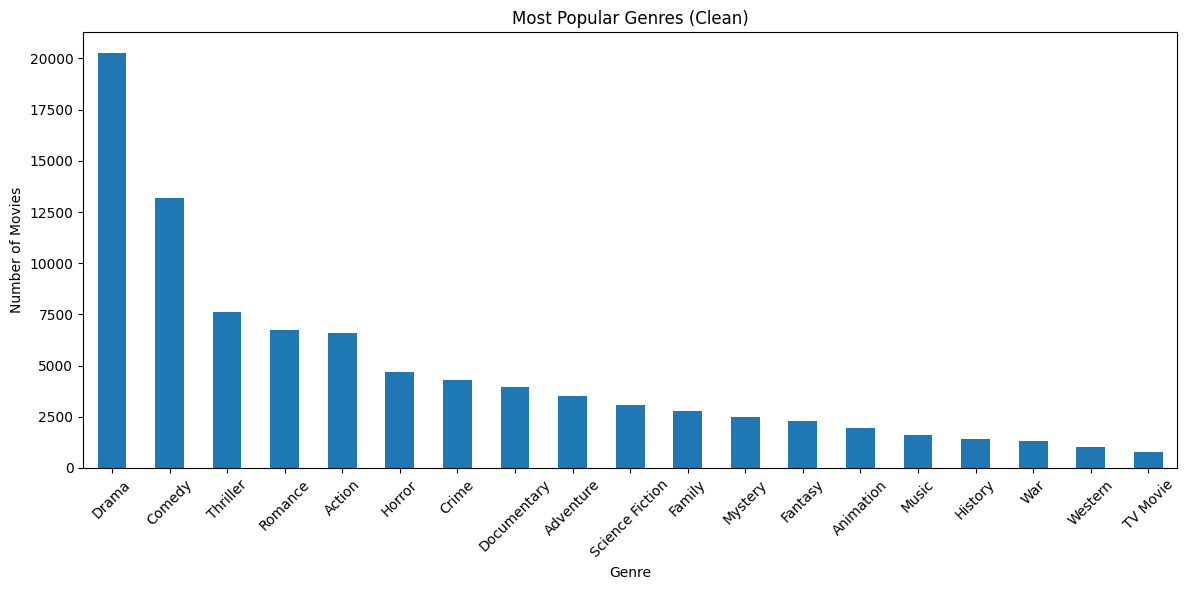

In [ ]:
movies_genre = movies_metadata[['genres']].copy()
movies_genre = movies_genre[movies_genre['genres'].notna()]          # keep non-null
movies_genre['genre_list'] = movies_genre['genres'].apply(safe_extract_genres)

# explode & hitung ulang
genre_exploded = movies_genre.explode('genre_list')
clean_counts   = genre_exploded['genre_list'].value_counts()

plt.figure(figsize=(12,6))
clean_counts.plot(kind='bar')
plt.title('Most Popular Genres (Clean)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretasi Visualisasi Genre Film Terpopuler**

Dari hasil visualisasi genre film pada dataset `movies_metadata`, terlihat bahwa:

- **Drama** merupakan genre yang paling dominan, dengan jumlah film terbanyak, diikuti oleh **Comedy**, **Thriller**, dan **Romance**.
- Genre-genre populer tersebut cenderung mencerminkan preferensi umum industri film untuk tema-tema emosional, hiburan ringan, dan ketegangan.
- Genre seperti **Western**, **TV Movie**, dan **War** memiliki jumlah film yang relatif sedikit, menandakan bahwa genre ini lebih niche atau kurang diproduksi secara massal.
- Distribusi genre menunjukkan adanya konsentrasi pada genre-genre mainstream, sementara genre lain cenderung memiliki representasi yang jauh lebih kecil.

Insight ini dapat membantu dalam memahami tren dominan dalam industri film, serta berguna dalam pengembangan sistem rekomendasi berdasarkan genre populer.

#### **2. Rating Dataset**
- **Statistik Deskriptif:**  
  Menghitung nilai minimum, maksimum, mean, dan distribusi rating.
- **Visualisasi Distribusi Rating:**  
  Membuat histogram untuk melihat persebaran nilai rating yang diberikan oleh user.

##### **Descriptive Statistics**

In [ ]:
ratings['rating'].describe()

,rating
count,100004.000000
mean,3.543608
std,1.058064
min,0.500000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


**Interpretasi Statistik Deskriptif `rating`**

Berdasarkan hasil statistik deskriptif:

- Jumlah data rating: **100.004** entri.
- **Rata-rata (mean)** rating: sekitar **3.54**, menunjukkan kecenderungan user memberikan rating cukup tinggi secara umum.
- **Median (50%)** dan **kuartil 75%** bernilai **4.0**, artinya lebih dari setengah user memberi rating ≥ 4.
- **Kuartil 25%** bernilai **3.0**, menunjukkan bahwa 75% rating berada di atas nilai ini.
- Nilai rating **berkisar antara 0.5 hingga 5.0**, dengan **standar deviasi sebesar 1.05**, mengindikasikan bahwa persebaran rating cukup terkonsentrasi di sekitar nilai tengah (3–4).

**Insight:**  
User cenderung memberikan rating yang positif terhadap film yang mereka tonton. Hal ini bisa berpengaruh pada sistem rekomendasi, karena adanya bias positif dalam persebaran rating.

##### **Data Visualization**

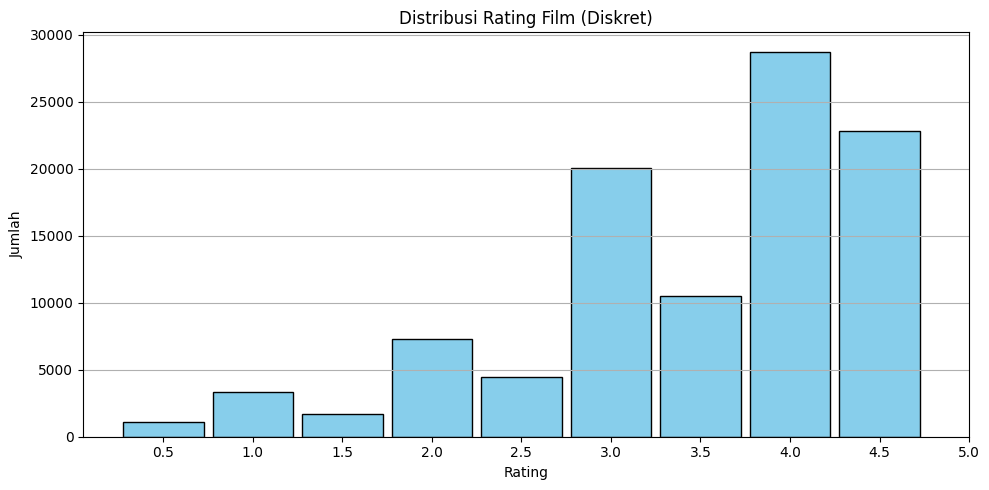

In [ ]:
bins = sorted(ratings['rating'].unique())

plt.figure(figsize=(10, 5))
plt.hist(ratings['rating'], bins=bins, align='left',
         rwidth=0.9, color='skyblue', edgecolor='black')
plt.title('Distribusi Rating Film (Diskret)')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(bins)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Interpretasi Histogram Rating Film**

Visualisasi menunjukkan distribusi diskret rating yang diberikan user terhadap film:

- Rating **4.0** adalah yang paling sering diberikan, diikuti oleh **3.0** dan **4.5**.
- Mayoritas rating berada pada rentang **3.0 hingga 5.0**, menandakan kecenderungan user memberi rating yang cukup tinggi.
- Rating rendah seperti **0.5 hingga 2.0** jauh lebih jarang muncul, menunjukkan bahwa user cenderung jarang memberi nilai jelek.
- Distribusi bersifat **right-skewed** (condong ke kanan), mencerminkan adanya **bias positif** dalam penilaian pengguna terhadap film.

**Insight:**  
Kecenderungan rating yang tinggi ini perlu diperhatikan dalam model rekomendasi, karena bisa menyebabkan overfitting terhadap film yang populer atau banyak dinilai positif.


#### **3. Links Dataset**
- **Analisis ID Unik:**  
  Mengecek keberagaman dan kelengkapan ID film dari berbagai sumber (IMDb, TMDb, dll).

In [ ]:
print("Unique movieId :", links['movieId'].nunique())
print("Unique imdbId  :", links['imdbId'].nunique())
print("Unique tmdbId  :", links['tmdbId'].nunique())
print("Missing tmdbId :", links['tmdbId'].isna().sum())
print("\nDtypes:\n", links.dtypes)

Unique movieId : 9125
Unique imdbId  : 9125
Unique tmdbId  : 9112
Missing tmdbId : 13

Dtypes:
 movieId      int64
imdbId       int64
tmdbId     float64
dtype: object


**Interpretasi EDA `links` Dataset**

Berdasarkan hasil eksplorasi:

- Jumlah nilai unik untuk `movieId` dan `imdbId` adalah **9125**, menandakan satu-ke-satu mapping yang konsisten di antara keduanya.
- `tmdbId` memiliki **9112 nilai unik**, sedikit lebih rendah dibanding yang lain.
- Terdapat **13 nilai `tmdbId` yang hilang (missing)**, sesuai dengan hasil data checking sebelumnya.
- Tipe data untuk `tmdbId` adalah `float64`, kemungkinan karena adanya nilai `NaN` (missing) yang membuatnya tidak terbaca sebagai `int64`.

**Insight:**  
`links` dataset memiliki struktur yang cukup rapi untuk menghubungkan berbagai sumber ID film.  
Namun, **13 baris dengan `tmdbId` yang hilang perlu ditangani** sebelum dilakukan merge atau pemodelan, terutama jika data dari TMDb digunakan sebagai referensi utama.


#### **4. Keywords Dataset**
Langkah ini bertujuan untuk menganalisis kata kunci (`keywords`) yang digunakan untuk mendeskripsikan film dalam dataset.

**Proses**:
- Kolom `keywords` berisi string list dari dictionary, sehingga perlu diekstrak menjadi list kata kunci menggunakan fungsi `extract_keywords`.
- Data kemudian di-*explode* agar setiap baris hanya berisi satu keyword untuk mempermudah analisis frekuensi.
- Dilakukan dua bentuk visualisasi:
  1. **Bar chart** untuk menampilkan **20 keyword paling umum** yang paling sering muncul.
  2. **Word cloud** untuk menyajikan visualisasi frekuensi keyword dalam bentuk artistik dan intuitif.

In [ ]:
def extract_keywords(kw_str):
    try:
        return [kw['name'] for kw in ast.literal_eval(kw_str)]
    except:
        return []

keywords['keyword_list'] = keywords['keywords'].apply(extract_keywords)
kw_exploded = keywords.explode('keyword_list')

##### **Data Visualization**

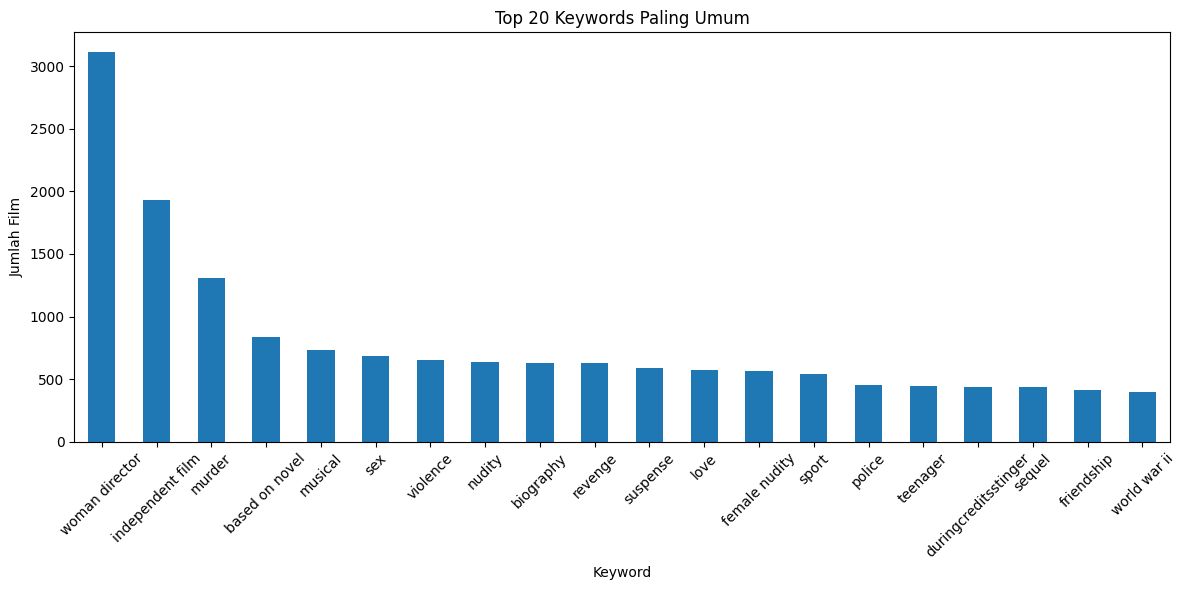

In [ ]:
top_kw = kw_exploded['keyword_list'].value_counts().head(20)

plt.figure(figsize=(12, 6))
top_kw.plot(kind='bar')
plt.title('Top 20 Keywords Paling Umum')
plt.xlabel('Keyword')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretasi Grafik Top 20 Keywords Film**

Grafik menunjukkan 20 kata kunci (`keywords`) yang paling sering muncul dalam deskripsi film:

- **"woman director"** menempati posisi teratas dengan lebih dari 3.000 film, menandakan bahwa pencantuman gender sutradara sebagai keyword cukup umum dilakukan — bisa jadi bagian dari tag identitas atau representasi.
- Keyword seperti **"independent film"**, **"murder"**, dan **"based on novel"** menggambarkan karakteristik umum dari produksi atau cerita film.
- Banyak keyword yang berkaitan dengan tema konten dewasa atau emosional seperti **"sex"**, **"violence"**, **"nudity"**, dan **"revenge"**, yang bisa menunjukkan kecenderungan film untuk menonjolkan sisi konflik dan intensitas.
- Keyword seperti **"love"**, **"friendship"**, dan **"teenager"** juga muncul, memperkuat bahwa relasi dan dinamika usia adalah tema-tema yang sering dibawa.
- Kehadiran keyword seperti **"sequel"** dan **"duringcreditsstinger"** juga menandakan banyaknya film berformat waralaba atau cinematic universe.

**Insight:**  
Keyword memberi gambaran yang cukup kuat terhadap **tema, tone, dan gaya produksi** dari film. Hal ini sangat berguna sebagai fitur konten dalam sistem rekomendasi berbasis content, terutama ketika digabungkan dengan metadata lain seperti genre dan overview.


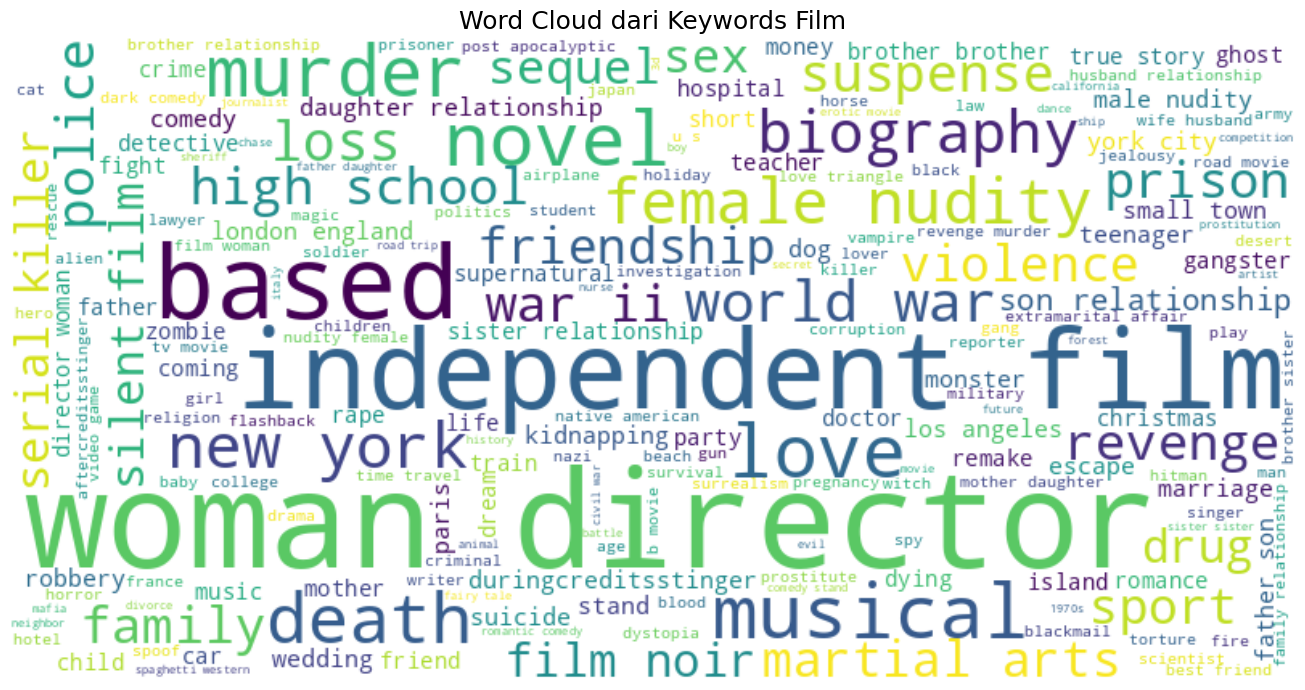

In [ ]:
from wordcloud import WordCloud

all_kw_text = ' '.join(kw_exploded['keyword_list'].dropna())
wc = WordCloud(width=800, height=400, background_color='white').generate(all_kw_text)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Keywords Film', fontsize=18)
plt.tight_layout()
plt.show()


**Interpretasi Word Cloud dari Keywords Film**

Word cloud memberikan gambaran visual terhadap kata kunci yang paling sering digunakan dalam deskripsi film:

- Keyword yang paling menonjol seperti **"woman director"**, **"independent film"**, **"murder"**, dan **"based on novel"** muncul dengan ukuran huruf paling besar, menandakan frekuensi kemunculan yang tinggi.
- Banyak kata kunci yang merepresentasikan tema cerita (misalnya: *death*, *love*, *revenge*, *friendship*, *ghost*, *suicide*), tempat (*new york*, *paris*, *york city*), bahkan karakter spesifik (*serial killer*, *teenager*).
- Kata-kata yang berkaitan dengan genre, gaya produksi, dan situasi juga terlihat, seperti *biography*, *high school*, *war*, *nudity*, *martial arts*, dan *escape*.

**Insight:**
- Word cloud ini menunjukkan **keragaman tema dan karakteristik film** dalam dataset.
- Keyword seperti ini sangat berguna dalam sistem rekomendasi berbasis konten (content-based), karena bisa mencerminkan kesamaan makna antar film yang tidak bisa dilihat hanya dari genre atau rating saja.

Word cloud ini juga memudahkan identifikasi **tema-tema dominan dan tren cerita** yang bisa jadi menarik buat segmentasi pengguna tertentu.


## **Data Preparation**

Tahap *Data Preparation* bertujuan untuk membersihkan dan mengolah data agar siap digunakan dalam proses modeling sistem rekomendasi. Berdasarkan alur kode, proses ini terdiri dari empat tahap utama:

---

### 1. Data Cleaning
### 2. Sanity Check
### 3. Merge Dataset
### 4. Final Feature Datasets (CB & CF)



### **Data Cleaning**

Langkah ini fokus pada konsistensi format dan penghapusan data yang tidak valid. Beberapa aksi utama yang dilakukan:

- **Konsistensi Kolom ID:**
  - Kolom `id` pada `movies_metadata` dikonversi menjadi numerik agar cocok dengan `tmdbId` di dataset `links`.
  - Nilai `NaN` pada kolom ID dihapus sebelum konversi tipe data.

- **Penghapusan Duplikat:**
  - Duplikat baris berdasarkan kolom `id` pada `movies_metadata` dihapus dengan menyimpan film dengan `vote_count` tertinggi.
  - Dataset `ratings`, `links`, dan `keywords` juga dibersihkan dari baris duplikat.

- **Pembersihan Kolom `genres`:**
  - Parsing nilai `genres` menjadi list of strings dan hanya menyimpan genre yang valid sesuai whitelist (misalnya: `'Drama'`, `'Comedy'`, dll).

- **Pembersihan Kolom `keywords`:**
  - Parsing data JSON-like menjadi string yang digabung dan di-lowercase agar lebih mudah digunakan pada content-based filtering.

- **Penanganan Missing Values:**
  - Baris yang tidak memiliki `title` dihapus.
  - Kolom-kolom dengan proporsi missing value lebih dari 30% dihapus dari dataset.

---


In [ ]:
# DATA CLEANING
# =====================

import ast

# ID column consistency
# =====================

# movies_metadata['id'] comes as string, sometimes '19995', sometimes '19995.0', sometimes 'tt123…'
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')
movies_metadata.dropna(subset=['id'], inplace=True)
movies_metadata['id'] = movies_metadata['id'].astype(int)       # => will match links['tmdbId']
links.dropna(subset=['tmdbId'], inplace=True)                   # just in case
links['tmdbId'] = links['tmdbId'].astype(int)


# Remove exact duplicate rows
# =====================

movies_metadata = (
    movies_metadata
      .sort_values(['id', 'vote_count'], ascending=[True, False])
      .drop_duplicates(subset='id', keep='first')
)
ratings.drop_duplicates(inplace=True)
links.drop_duplicates(inplace=True)

# Only keep the first occurrence of each movie id
keywords = keywords.drop_duplicates(subset='id', keep='first')


# Clean `genres`
# =====================

VALID_GENRES = {
    'Action','Adventure','Animation','Comedy','Crime','Documentary','Drama',
    'Family','Fantasy','History','Horror','Music','Mystery','Romance',
    'Science Fiction','TV Movie','Thriller','War','Western'
}

def safe_extract_genres(genre_str):
    """Return list of valid genre names or empty list if parsing fails."""
    try:
        parsed = ast.literal_eval(genre_str)
        if isinstance(parsed, list):
            return [g.get('name') for g in parsed
                    if isinstance(g, dict) and g.get('name') in VALID_GENRES]
    except (ValueError, SyntaxError):
        pass
    return []

movies_metadata['genres'] = movies_metadata['genres'].apply(safe_extract_genres)


# Clean `keywords`
# =====================

def extract_keywords(kw_str):
    """Parse JSON-like keyword column and return a space-joined string."""
    try:
        parsed = ast.literal_eval(kw_str)
        if isinstance(parsed, list):
            words = [k['name'] for k in parsed if isinstance(k, dict) and 'name' in k]
            return ' '.join(words).lower()
    except (ValueError, SyntaxError):
        pass
    return ''

keywords['keywords'] = keywords['keywords'].apply(extract_keywords)


# Missing-value strategy
# =====================

# Drop rows missing *critical* info
movies_metadata.dropna(subset=['title'], inplace=True)

# Optionally drop cols with >30 % NaN
missing_ratio = movies_metadata.isnull().mean()
cols_to_drop  = missing_ratio[missing_ratio > 0.30].index
movies_metadata.drop(columns=cols_to_drop, inplace=True)

print("Data cleaning complete")


Data cleaning complete


<ipython-input-18-cd80e50d4503>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keywords['keywords'] = keywords['keywords'].apply(extract_keywords)


### **Sanity Check**

Tahap ini memastikan bahwa hasil *cleaning* berjalan dengan benar. Beberapa validasi yang dilakukan:

- Memastikan tidak ada ID film yang duplikat.
- Mengecek apakah kolom penting seperti `title` dan `genres` tidak mengandung missing value.
- Validasi tipe data (`genres` bertipe list dan `keywords` bertipe string).
- Memastikan bahwa semua genre berada dalam daftar whitelist yang ditentukan.

Jika ada keanehan seperti tipe data tidak sesuai atau genre tak dikenal, proses akan dihentikan melalui `assert`.



In [ ]:
# Sanity Check
# =====================

def sanity_cleaning(movies_df, kw_df):
    # 1. Row count & duplicates (by primary key)
    print("movies rows:", movies_df.shape[0])
    print("dup movie IDs:", movies_df.duplicated(subset='id').sum())
    assert movies_df.duplicated(subset='id').sum() == 0, "Dup movie IDs found!"

    # 2. Critical NaNs
    crit_cols = ['title', 'genres']  # add more if you rely on them later
    print("\nNaNs in critical cols:")
    print(movies_df[crit_cols].isna().sum())
    assert movies_df[crit_cols].isna().sum().sum() == 0, "Missing critical values!"

    # 3. Data-type expectations
    assert movies_df['genres'].map(type).eq(list).all(), "`genres` not list everywhere"
    assert kw_df['keywords'].map(type).eq(str).all(), "`keywords` not str everywhere"

    # 4. Genre whitelist
    bad_genres = (
        movies_df['genres'].explode().dropna()
           .loc[lambda g: ~g.isin(VALID_GENRES)]
    )
    assert bad_genres.empty, f"Unexpected genres: {bad_genres.unique()}"

    print("\nCleaning sanity checks passed!")

sanity_cleaning(movies_metadata, keywords)


movies rows: 45430
dup movie IDs: 0

NaNs in critical cols:
title     0
genres    0
dtype: int64

Cleaning sanity checks passed!


### **Merge Datasets**

Setelah data bersih, dilakukan proses penggabungan dataset agar siap untuk modeling:

- `movies_metadata` digabung dengan `keywords` berdasarkan kolom `id`.
- Hasilnya kemudian digabung lagi dengan `links` untuk mendapatkan kolom `movieId` sebagai key utama yang digunakan baik untuk CB maupun CF.
- Kolom `tmdbId` dihapus karena `movieId` akan digunakan sebagai *primary key* universal.
- Dataset `ratings` tetap dipisah karena hanya digunakan pada collaborative filtering.

---

In [ ]:
# Merge Dataset

# Merge movies_metadata  keywords  (both keyed by 'id')
movies_kw = pd.merge(
    movies_metadata,
    keywords[['id', 'keywords']],
    how='left',
    on='id'
)

# Bring in movieId (from links) so CB & CF share the same primary key
movies_kw_links = pd.merge(
    movies_kw,
    links[['movieId', 'tmdbId']],
    how='inner',
    left_on='id',
    right_on='tmdbId'
).drop(columns=['tmdbId'])   # we keep movieId as the master key

# Ratings stays separate for CF
print("movies_kw_links shape:", movies_kw_links.shape)
print("ratings shape        :", ratings.shape)


movies_kw_links shape: (9082, 23)
ratings shape        : (100004, 4)


### **Final Feature Dataset**

Dua dataset akhir disiapkan berdasarkan pendekatan yang digunakan:

- **Content-Based Filtering (CB):**
  - Disusun dari `movies_metadata`, `keywords`, dan `links`, menghasilkan dataframe `cb_movies`.
  - Fitur yang digunakan mencakup `title`, `genres`, `keywords`, `popularity`, `vote_average`, `vote_count`, dan `release_year` (diambil dari `release_date`).

- **Collaborative Filtering (CF):**
  - Menggunakan user-item rating matrix dari dataset `ratings`, menghasilkan dataframe `cf_ratings` berisi `userId`, `movieId`, dan `rating`.

Kedua dataframe ini akan digunakan sebagai basis untuk membangun sistem rekomendasi berbasis konten dan kolaboratif.

In [ ]:
# Final Feature Sets

# content-based dataframe
cb_movies = movies_kw_links[
    ['movieId', 'title', 'genres', 'keywords', 'overview', 'popularity',
     'vote_average', 'vote_count', 'release_date']
].copy()

# make release_year numeric
cb_movies['release_year'] = (
    pd.to_datetime(cb_movies['release_date'], errors='coerce')
      .dt.year
)

# collaborative-filtering dataframe
cf_ratings = ratings[['userId', 'movieId', 'rating']].copy()

print("Content Based Feature Dataset:", cb_movies.shape)
print("Collaborative Filtering Feature Dataset:", cf_ratings.shape)


Content Based Feature Dataset: (9082, 10)
Collaborative Filtering Feature Dataset: (100004, 3)


In [ ]:
cb_movies

,movieId,title,genres,keywords,overview,popularity,vote_average,vote_count,release_date,release_year
0,4470,Ariel,"[Drama, Crime]",underdog prison factory worker prisoner helsin...,Taisto Kasurinen is a Finnish coal miner whose...,3.860491,7.1,44.0,1988-10-21,1988
1,18,Four Rooms,"[Crime, Comedy]",hotel new year's eve witch bet hotel room sper...,It's Ted the Bellhop's first night on the job....,9.026586,6.5,539.0,1995-12-09,1995
2,479,Judgment Night,"[Action, Thriller, Crime]",chicago drug dealer boxing match escape one night,"While racing to a boxing match, Frank, Mike, J...",5.538671,6.4,79.0,1993-10-15,1993
3,260,Star Wars,"[Adventure, Action, Science Fiction]",android galaxy hermit death star lightsaber je...,Princess Leia is captured and held hostage by ...,42.149697,8.1,6778.0,1977-05-25,1977
4,6377,Finding Nemo,"[Animation, Family]",father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...",25.497794,7.6,6292.0,2003-05-30,2003
...,...,...,...,...,...,...,...,...,...,...
9077,160718,Piper,"[Family, Animation]",bird fear short,A mother bird tries to teach her little one ho...,11.243161,8.2,487.0,2016-06-16,2016
9078,161155,Sunspring,[Science Fiction],experimental film nonsense,Sunspring is a short film about three people l...,1.124787,6.6,7.0,2016-06-09,2016
9079,162672,Mohenjo Daro,"[Adventure, Drama, History, Romance]",bollywood,"Village lad Sarman is drawn to big, bad Mohenj...",1.423358,6.7,26.0,2016-08-11,2016
9080,875,Nothing to Lose,"[Action, Crime, Drama]",,A young street fighter seeks revenge against a...,0.001771,0.0,0.0,1994-01-01,1994


In [ ]:
cf_ratings

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


## **Model Development**

Pada tahap ini, kita membangun dan mengembangkan dua pendekatan utama dalam sistem rekomendasi film, yaitu **Content-Based Filtering (CBF)** dan **Collaborative Filtering (CF)**. Masing-masing pendekatan dikembangkan melalui tahapan yang sistematis mulai dari *model building*, *training*, hingga *evaluation* untuk mengukur performanya.

- **Content-Based Filtering** merekomendasikan film berdasarkan kemiripan konten seperti genre, judul, dan kata kunci dari film yang pernah disukai user.
- **Collaborative Filtering** fokus pada pola interaksi user terhadap film, yaitu menggunakan data rating sebagai dasar untuk memprediksi preferensi.

Selain membangun model, tahap ini juga mencakup proses evaluasi untuk membandingkan performa antar pendekatan. Hasil evaluasi akan menjadi dasar dalam menentukan model mana


### **Content Based Filtering**

Content-Based Filtering (CBF) adalah pendekatan rekomendasi yang berfokus pada karakteristik konten dari setiap item. Dalam konteks ini, kita menggunakan informasi dari film seperti **judul**, **kata kunci (keywords)**, dan **genre** untuk menentukan kemiripan antar film. Ide dasarnya: jika user menyukai sebuah film, maka mereka kemungkinan juga akan menyukai film lain yang memiliki konten serupa.

Pendekatan ini tidak memerlukan data dari user lain dan bisa bekerja dengan baik bahkan ketika user baru hanya menyukai satu atau dua film — cocok untuk mengatasi masalah *cold-start* pada user. Di bagian ini, kita akan membangun dua model content-based dengan teknik vektorisasi berbeda, lalu membandingkan hasil rekomendasinya.


#### **Model Building**

Pada tahap ini, model content-based dibangun dengan cara menggabungkan beberapa fitur penting dari setiap film, yaitu:
- **Judul film (`title`)**
- **Kata kunci (`keywords`)**
- **Genre (`genres`)**

Fitur-fitur tersebut digabungkan ke dalam satu kolom teks `combined_features`, yang nantinya akan digunakan sebagai dasar dalam proses perhitungan kesamaan antar film.

Langkah-langkah utama dalam pembangunan model:
1. **Preprocessing**: Menggabungkan dan menormalkan teks dari kolom fitur (diubah ke lowercase dan digabung jadi satu string).
2. **Vectorization**: Mengubah teks menjadi representasi numerik menggunakan dua teknik berbeda:
   - `TF-IDF Vectorizer` untuk menangkap bobot pentingnya kata.
   - `CountVectorizer` untuk menghitung frekuensi kata.
3. **Similarity Computation**: Menghitung **cosine similarity** antar semua film berdasarkan hasil vektorisasi.
4. **Rekomendasi**: Dibuat fungsi `get_recs()` yang akan mengembalikan Top-N film yang paling mirip dengan film input berdasarkan skor similarity-nya.

Model yang dihasilkan bersifat fleksibel karena dapat diganti-ganti jenis vectorizer-nya sesuai kebutuhan. Proses ini menghasilkan sistem rekomendasi berbasis konten yang tidak bergantung pada data dari user lain.


Library

In [ ]:
# Vectorisers & similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Configuration

In [ ]:
# CONFIG
TOP_N = 10          # number of recommendations to return

Combined Features

In [ ]:
# create combined_features:

cb_movies["genres"] = cb_movies["genres"].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# combined text features
cb_movies["combined_features"] = (
    cb_movies["title"].fillna('') + " "
    + cb_movies["keywords"].fillna('') + " "
    + cb_movies["genres"].fillna('')
).str.lower()


Model Function

In [ ]:
# CONTENT-BASED MODELS
# ============================================================
def _build_cb_model(vectorizer, movies_df):
    """Fit vectoriser, compute cosine-sim matrix, return helper fn."""
    X = vectorizer.fit_transform(movies_df["combined_features"])
    sim_matrix = cosine_similarity(X, X, dense_output=False)

    # Map index ⇄ movieId for quick lookup
    idx_to_mid = dict(enumerate(movies_df["movieId"]))
    mid_to_idx = {v: k for k, v in idx_to_mid.items()}

    def get_recs(title, top_n=TOP_N):
        """Return (movieId, title, score) for the *top_n* similar films."""
        if title not in movies_df["title"].values:
            raise ValueError("Title not found!")
        idx = movies_df[movies_df["title"] == title].index[0]
        sim_scores = list(enumerate(sim_matrix[idx].toarray().ravel()))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # skip itself (index 0)
        top = [(idx_to_mid[i], movies_df.loc[i, "title"], score)
               for i, score in sim_scores[1:top_n + 1]]
        return pd.DataFrame(top, columns=["movieId", "title", "similarity"])

    return get_recs

#### **Model Computation**

Setelah proses pembangunan model disiapkan, tahap selanjutnya adalah melakukan komputasi vektor dan matriks kesamaan antar film. Di bagian ini, dua model content-based dikonstruksi menggunakan pendekatan berbeda untuk vectorization:

- **TF-IDF Vectorizer**  
  Mengubah teks menjadi vektor berdasarkan *Term Frequency–Inverse Document Frequency*, sehingga kata-kata yang umum diabaikan dan kata-kata unik tiap film diberi bobot lebih tinggi.  
  Selain itu, digunakan `ngram_range=(1, 2)` untuk mempertimbangkan unigram dan bigram.

- **CountVectorizer**  
  Mengubah teks menjadi representasi vektor sederhana berdasarkan jumlah kemunculan kata (frekuensi), tanpa mempertimbangkan bobot pentingnya.

Masing-masing vectorizer dimasukkan ke dalam fungsi `_build_cb_model()` untuk menghasilkan dua model rekomendasi:
- `get_recs_tfidf` → model berbasis TF-IDF
- `get_recs_count` → model berbasis CountVectorizer

Kedua model ini siap digunakan untuk menghitung kesamaan antar film dan menghasilkan rekomendasi berbasis konten yang berbeda gaya pendekatannya.


In [ ]:
# TF-IDF + Cosine
tfidf_vec = TfidfVectorizer(stop_words="english", ngram_range=(1, 2))
get_recs_tfidf = _build_cb_model(tfidf_vec, cb_movies)

In [ ]:
# CountVectorizer + Cosine
count_vec = CountVectorizer(stop_words="english")
get_recs_count = _build_cb_model(count_vec, cb_movies)

#### **Model Evaluation**

Evaluasi model Content-Based Filtering dilakukan menggunakan metode sederhana namun efektif yang disebut **sanity check**. Tujuannya adalah untuk melihat apakah model mampu merekomendasikan film yang relevan berdasarkan preferensi user.

Langkah-langkah evaluasinya:
1. **Ambil user sample** (misalnya `user_id = 45`) dan cari film yang mereka beri rating tinggi (≥ 4.0).
2. **Pilih satu film acak** dari daftar film yang disukai tersebut sebagai referensi (`ref_title`).
3. **Gunakan model rekomendasi** untuk mencari Top-N film yang mirip secara konten dengan film referensi.
4. **Bandingkan hasil rekomendasi** dari dua model:
   - TF-IDF + Cosine Similarity
   - CountVectorizer + Cosine Similarity

Hasil evaluasi ditampilkan dalam bentuk tabel yang mencantumkan:
- Film-film yang disukai user
- Rekomendasi film dari masing-masing model
- Genre dan skor similarity dari setiap film yang direkomendasikan

Meskipun sederhana, metode ini cukup efektif untuk memastikan bahwa model mampu menangkap kesamaan konten yang relevan dengan preferensi pengguna.



In [ ]:
from IPython.display import display

# sanity-check helper
# ------------------------------------------------------------
def sanity_check_cb(user_id,
                    get_recs_fn,
                    movies_df,
                    ratings_df,
                    k=10,
                    threshold=4.0,
                    random_state=42):
    liked_df = (
        ratings_df[(ratings_df["userId"] == user_id) & (ratings_df["rating"] >= threshold)]
        .merge(movies_df[["movieId", "title", "genres"]], on="movieId", how="left")
    )
    if liked_df.empty:
        raise ValueError(f"User {user_id} has no movies rated ≥ {threshold}")

    ref_title = liked_df.sample(1, random_state=random_state)["title"].values[0]

    rec_df = (
        get_recs_fn(ref_title, top_n=k)
        .merge(movies_df[["movieId", "genres"]], on="movieId", how="left")
    )

    return ref_title, rec_df, liked_df.sort_values("rating", ascending=False)

# run sanity-check for both CB models
# ------------------------------------------------------------
user_id = 45
k = 10
threshold = 4.0

ref_title, tfidf_recs, liked = sanity_check_cb(
    user_id, get_recs_tfidf, cb_movies, cf_ratings, k, threshold
)

_, count_recs, _ = sanity_check_cb(       # same ref_title via k=0 trick
    user_id, get_recs_count, cb_movies, cf_ratings, k, threshold
)

# Pretty print
# ------------------------------------------------------------
print(f"\nReference film for user {user_id}: '{ref_title}'\n")

print("Films this user rated ≥ 4:")
display(liked[["movieId", "title", "genres", "rating"]].head(20))

print("\nTop-10 recommendations – TF-IDF model:")
display(tfidf_recs[["movieId", "title", "genres", "similarity"]])

print("\nTop-10 recommendations – CountVectorizer model:")
display(count_recs[["movieId", "title", "genres", "similarity"]])



Reference film for user 45: 'Beauty and the Beast'

Films this user rated ≥ 4:


,movieId,title,genres,rating
1,903,Vertigo,Mystery Romance Thriller,5.0
12,26151,Au Hasard Balthazar,Drama,5.0
11,7064,Beauty and the Beast,Drama Fantasy Romance,5.0
4,1673,Boogie Nights,Drama,4.5
3,1333,The Birds,Horror,4.5
8,3307,City Lights,Comedy Drama Romance,4.5
7,3160,Magnolia,Drama,4.5
5,1748,Dark City,Mystery Science Fiction,4.5
6,2692,Run Lola Run,Action Drama Thriller,4.5
2,1199,Brazil,Comedy Science Fiction,4.0



Top-10 recommendations – TF-IDF model:


,movieId,title,genres,similarity
0,595,Beauty and the Beast,Romance Family Animation Fantasy Music,0.232116
1,781,Stealing Beauty,Drama Romance,0.169768
2,8915,Stage Beauty,Comedy Drama Romance,0.169187
3,2563,Dangerous Beauty,Drama Romance,0.160937
4,100032,Beauty Is Embarrassing,Documentary,0.145942
5,8929,Black Beauty,Drama Family,0.139603
6,8851,Smile,Comedy,0.126161
7,3612,The Slipper and the Rose,Adventure Family Fantasy Romance,0.125474
8,46578,Little Miss Sunshine,Comedy Drama,0.125412
9,103984,The Great Beauty,Comedy Drama,0.120418



Top-10 recommendations – CountVectorizer model:


,movieId,title,genres,similarity
0,781,Stealing Beauty,Drama Romance,0.577350
1,8915,Stage Beauty,Comedy Drama Romance,0.516398
2,2563,Dangerous Beauty,Drama Romance,0.500000
3,595,Beauty and the Beast,Romance Family Animation Fantasy Music,0.421350
4,8929,Black Beauty,Drama Family,0.387298
5,61361,The Women,Comedy Drama Romance,0.384900
6,58998,Forgetting Sarah Marshall,Comedy Romance Drama,0.365148
7,2894,Romance,Romance Drama Comedy,0.353553
8,147010,Thou Gild'st the Even,Drama Romance Fantasy,0.353553
9,55498,Silk,Drama Romance,0.333333


**Interpretasi Evaluasi Model**

Berdasarkan hasil evaluasi menggunakan user dengan ID `45`, model merekomendasikan film yang memiliki kemiripan konten dengan salah satu film favorit user, yaitu **"Beauty and the Beast"**.

User ini memiliki preferensi yang cukup jelas terhadap genre **Drama**, **Romance**, dan beberapa elemen **Fantasy**, **Thriller**, dan **Comedy**. Hal ini terlihat dari daftar film yang mereka beri rating tinggi, seperti *Vertigo*, *Boogie Nights*, *City Lights*, dan *Talk to Her*.

##### TF-IDF Model
Rekomendasi dari model TF-IDF menampilkan film-film yang cukup relevan secara tematik dan emosional, seperti:
- *Stealing Beauty*
- *Stage Beauty*
- *Dangerous Beauty*

Meskipun skor similarity relatif kecil (di bawah 0.25), model tetap mampu menyarankan film yang berkaitan erat dengan kata kunci "beauty" dan nuansa romantis. TF-IDF cenderung lebih fokus pada **kata-kata unik dan bobot tematik**.

##### CountVectorizer Model
Model ini memberikan skor similarity yang lebih tinggi secara numerik (hingga > 0.5), dengan film-film yang hampir identik secara kata seperti:
- *Stealing Beauty*
- *Stage Beauty*
- *Dangerous Beauty*

Hasilnya sangat mirip dengan TF-IDF dalam hal judul, tetapi lebih literal karena CountVectorizer hanya menghitung **frekuensi kata**. Model ini lebih mudah "terpengaruh" oleh kemiripan kata secara eksplisit daripada bobot pentingnya.

##### Insight
- Kedua model berhasil menemukan film-film yang berada di **jalur preferensi user**, terutama dalam tema romantis dan drama.
- TF-IDF bekerja baik untuk menangkap nuansa dan bobot kata, meski skor similarity-nya lebih kecil.
- CountVectorizer lebih sensitif terhadap kata yang sering muncul, menghasilkan skor similarity yang lebih tinggi tapi juga lebih "kasar" dalam interpretasi.

Secara keseluruhan, hasil ini menunjukkan bahwa **model content-based dapat memberikan rekomendasi yang relevan** dengan memanfaatkan informasi konten film, bahkan tanpa data interaksi user lain.

**Sehingga model yang digunakan yaitu TF-IDF Vectorized**

### **Collaborative Filtering**

Collaborative Filtering (CF) adalah pendekatan sistem rekomendasi yang berdasarkan pada pola interaksi pengguna terhadap item, bukan pada konten dari item itu sendiri. Dalam konteks proyek ini, CF memanfaatkan **data rating dari user terhadap film** untuk mempelajari pola preferensi yang serupa antar pengguna atau antar film.

Ide utamanya: *"Jika dua user menyukai film yang sama, maka mereka cenderung akan menyukai film lainnya yang juga disukai oleh user dengan preferensi serupa."*

CF sangat efektif untuk menghasilkan rekomendasi **personalized** karena benar-benar didasarkan pada kebiasaan dan interaksi nyata dari pengguna. Namun, pendekatan ini juga memiliki tantangan seperti:
- *Cold-start problem* untuk user baru tanpa histori rating
- *Sparsity problem* karena kebanyakan user hanya memberi rating ke sedikit film

Dalam proyek ini, dua pendekatan CF akan digunakan:
1. **Memory-Based Collaborative Filtering** – Menghitung kesamaan antar item berdasarkan user-item matrix.
2. **Model-Based Collaborative Filtering** dengan neural network sederhana (*RecommenderNet*).

Keduanya akan dibandingkan dari sisi hasil rekomendasi dan performa metrik.

#### **Model Building**

Pada Collaborative Filtering, kita membangun dua jenis model berdasarkan data rating antar user dan film:

---

**1. Memory-Based Collaborative Filtering**

Pendekatan ini menggunakan **item-item similarity** berdasarkan pola rating yang diberikan oleh user. Langkah-langkah utamanya:

- Membuat **user-item matrix** dari data rating.
- Mengubahnya menjadi matriks sparse (`csr_matrix`) untuk efisiensi komputasi.
- Menghitung **cosine similarity** antar film berdasarkan rating user.
- Mengembangkan fungsi `get_recs_memory()` untuk memberikan rekomendasi film kepada user berdasarkan rating tinggi dari film serupa yang pernah ditonton.

Pendekatan ini mudah diimplementasikan dan tidak memerlukan proses training model, tetapi bisa terkena masalah sparsity jika banyak film belum memiliki cukup rating.

---

**2. Model-Based Collaborative Filtering (RecommenderNet)**

Model ini menggunakan pendekatan neural network sederhana untuk mempelajari hubungan antara user dan film. Langkah-langkahnya:

- Melakukan encoding terhadap `userId` dan `movieId` menjadi indeks numerik.
- Membagi data menjadi **training dan validation set**.
- Membangun arsitektur **embedding layer** untuk user dan film.
- Menggunakan **dot product** dari embedding sebagai prediksi rating.
- Melatih model menggunakan *Mean Squared Error (MSE)* dan mengevaluasi dengan *Root Mean Squared Error (RMSE)*.

Model ini dikenal sebagai **RecommenderNet** dan mampu menangkap representasi laten dari user dan film, memberikan hasil yang lebih fleksibel dan akurat dalam jangka panjang, terutama untuk dataset yang besar.

---

Kedua model ini akan dibandingkan pada tahap evaluasi untuk melihat mana yang lebih optimal dalam memberikan rekomendasi personalized.


Library

In [ ]:
# CF – memory-based
from scipy.sparse import csr_matrix

# CF – model-based
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from sklearn.model_selection import train_test_split

# Vectorisers & similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Configuration

In [ ]:
# CONFIG
TOP_N = 10          # number of recommendations to return


Memory Based CF Function

In [ ]:
# MEMORY-BASED CF
# ================

def build_cf_memory(ratings_df):
    user_item = ratings_df.pivot_table(index="movieId",
                                       columns="userId",
                                       values="rating").fillna(0)
    sparse_matrix = csr_matrix(user_item.values)
    item_sim = cosine_similarity(sparse_matrix, dense_output=False)
    idx_to_mid = dict(enumerate(user_item.index))
    mid_to_idx = {v: k for k, v in idx_to_mid.items()}

    def get_recs_memory(user_id, top_n=TOP_N, min_rating=3.0):
        """Item-based CF: score unseen movies for *user_id*."""
        if user_id not in ratings_df["userId"].values:
            raise ValueError("User not found!")
        user_ratings = ratings_df[ratings_df["userId"] == user_id]
        seen = set(user_ratings["movieId"])
        # aggregate similarity * rating
        scores = {}
        for _, row in user_ratings.iterrows():
            if row["rating"] < min_rating:
                continue
            idx = mid_to_idx[row["movieId"]]
            sim_vec = item_sim[idx].toarray().ravel()
            for i, sim in enumerate(sim_vec):
                mid = idx_to_mid[i]
                if mid in seen or sim <= 0:
                    continue
                scores[mid] = scores.get(mid, 0) + sim * row["rating"]

        best = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
        titles = cb_movies.set_index("movieId").loc[[m for m, _ in best], "title"]
        return pd.DataFrame(
            {"movieId": [m for m, _ in best],
             "title": titles.values,
             "score": [s for _, s in best]}
        )

    # expose internals for evaluation
    get_recs_memory.item_sim   = item_sim
    get_recs_memory.mid_to_idx = mid_to_idx
    return get_recs_memory


Recommender Net Function

In [ ]:
# RECOMMENDER-NET CF
# ===================

def build_cf_recommendernet(ratings_df, embed_dim=50, epochs=10, batch=256):
    # Encode ids
    user_ids = ratings_df["userId"].unique()
    movie_ids = ratings_df["movieId"].unique()

    user2idx = {u: i for i, u in enumerate(user_ids)}
    movie2idx = {m: i for i, m in enumerate(movie_ids)}

    ratings_df["user_enc"] = ratings_df["userId"].map(user2idx)
    ratings_df["movie_enc"] = ratings_df["movieId"].map(movie2idx)

    X = ratings_df[["user_enc", "movie_enc"]].values
    y = ratings_df["rating"].values.astype(np.float32)

    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    n_users = len(user_ids)
    n_movies = len(movie_ids)

    # --- Model
    user_in = layers.Input(shape=(), dtype="int32")
    movie_in = layers.Input(shape=(), dtype="int32")

    user_emb = layers.Embedding(n_users, embed_dim)(user_in)
    movie_emb = layers.Embedding(n_movies, embed_dim)(movie_in)

    dot = layers.Dot(axes=1)([user_emb, movie_emb])
    dot = layers.Flatten()(dot)
    out = layers.Activation("sigmoid")(dot)       # rating normalised 0-1

    model = Model([user_in, movie_in], out)
    model.compile(loss="mse",
                  optimizer="adam",
                  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

    history = model.fit([X_tr[:, 0], X_tr[:, 1]], y_tr,
              validation_data=([X_val[:, 0], X_val[:, 1]], y_val),
              epochs=epochs, batch_size=batch, verbose=1)

    def get_recs_nn(user_id, top_n=TOP_N):
        if user_id not in user2idx:
            raise ValueError("User not found!")
        user_enc = user2idx[user_id]
        # movies not yet rated
        seen = set(ratings_df[ratings_df["userId"] == user_id]["movieId"])
        candidates = [m for m in movie_ids if m not in seen]
        movie_encs = np.array([movie2idx[m] for m in candidates])
        preds = model.predict([np.full_like(movie_encs, user_enc), movie_encs],
                              verbose=0).ravel()
        top_idx = preds.argsort()[::-1][:top_n]
        best_mids = [candidates[i] for i in top_idx]
        titles = cb_movies.set_index("movieId").loc[best_mids, "title"]
        return pd.DataFrame(
            {"movieId": best_mids,
             "title": titles.values,
             "score": preds[top_idx]}
        )
        return pd.DataFrame(
            {"movieId": best_mids,
             "title": titles.values,
             "score": preds[top_idx]}
        )

    # expose artefacts
    get_recs_nn.model   = model
    get_recs_nn.history = history
    get_recs_nn.X_val   = X_val
    get_recs_nn.y_val   = y_val
    return get_recs_nn

#### **Train the Model**

Proses training dilakukan dengan memanggil dua fungsi utama:

- `build_cf_memory()` untuk membuat model Memory-Based Collaborative Filtering. Fungsi ini membentuk user-item matrix dan menghitung similarity antar item.
- `build_cf_recommendernet()` untuk melatih model neural network sederhana (RecommenderNet) berbasis embedding. Model ini dilatih menggunakan data rating user untuk mempelajari representasi laten dari user dan film.

Kedua model ini selanjutnya siap dievaluasi dan digunakan untuk menghasilkan rekomendasi personalized.


In [ ]:
get_recs_memory = build_cf_memory(cf_ratings)

In [ ]:
get_recs_nn = build_cf_recommendernet(cf_ratings)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 10.3690 - rmse: 3.2201 - val_loss: 10.1894 - val_rmse: 3.1921
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.5856 - rmse: 3.0956 - val_loss: 8.3434 - val_rmse: 2.8885
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 8.0927 - rmse: 2.8447 - val_loss: 7.9455 - val_rmse: 2.8188
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7.7736 - rmse: 2.7881 - val_loss: 7.8326 - val_rmse: 2.7987
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.6918 - rmse: 2.7734 - val_loss: 7.7867 - val_rmse: 2.7905
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7.6485 - rmse: 2.7656 - val_loss: 7.7642 - val_rmse: 2.7864
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.6106 - rmse: 2.7587 - val_loss: 7.7516 - val_rmse: 2.7842
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 7.6008 - rmse: 2.7570 - val_loss: 7.7439 - val_rmse: 2.7828
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━

#### **Model Evaluation**

Evaluasi model Collaborative Filtering dilakukan dengan menggunakan metrik **Root Mean Squared Error (RMSE)**, yang mengukur seberapa dekat prediksi model terhadap rating aktual dari user.

Dua model dievaluasi secara terpisah:

- **Memory-Based CF**  
  Prediksi rating dihitung menggunakan kontribusi rating dari film serupa (weighted average by similarity). Nilai RMSE dihitung berdasarkan sampel acak dari data rating.

- **RecommenderNet**  
  RMSE dihitung pada data validasi yang telah dipisahkan sebelumnya. Selain itu, ditampilkan juga **learning curve** untuk memvisualisasikan perkembangan error selama training.

Akhirnya, kedua nilai RMSE dibandingkan secara visual menggunakan bar chart sederhana untuk melihat model mana yang memberikan performa prediksi terbaik.


Memory Based RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

# MEMORY-BASED  RMSE
def rmse_memory(get_recs_memory_fn, ratings_df, sample_size=10_000):
    item_sim   = get_recs_memory_fn.item_sim
    mid_to_idx = get_recs_memory_fn.mid_to_idx

    def predict(u, m):
        hist = ratings_df[ratings_df.userId == u][["movieId", "rating"]]
        if hist.empty or m not in mid_to_idx:
            return np.nan
        sims, rats = [], []
        tgt = mid_to_idx[m]
        for mid, r in hist.itertuples(index=False):
            idx = mid_to_idx.get(mid)
            if idx is None or idx == tgt:
                continue
            sim = item_sim[tgt, idx]
            if sim > 0:
                sims.append(sim); rats.append(r)
        return np.dot(sims, rats)/sum(sims) if sims else np.nan

    samp = ratings_df.sample(n=min(sample_size, len(ratings_df)), random_state=42)
    true, pred = [], []
    for u, m, r, *_ in samp.itertuples(index=False):
      p = predict(u, m)
      if not np.isnan(p):
          true.append(r)
          pred.append(p)

    return np.sqrt(mean_squared_error(true, pred))

Recommender-Net RMSE

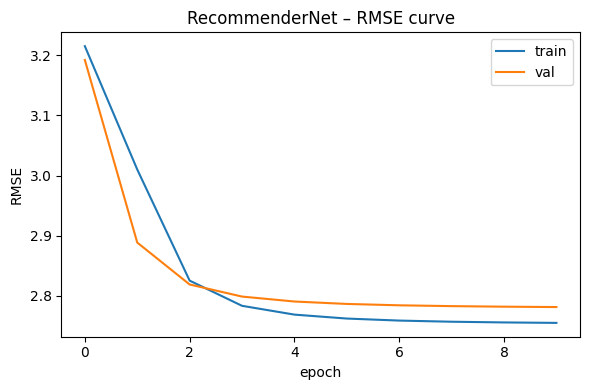

In [ ]:
# RECOMMENDER-NET  RMSE + PLOT
def rmse_nn(get_recs_nn_fn):
    model = get_recs_nn_fn.model
    X_val, y_val = get_recs_nn_fn.X_val, get_recs_nn_fn.y_val
    preds = model.predict([X_val[:,0], X_val[:,1]], verbose=0).ravel()
    return np.sqrt(mean_squared_error(y_val, preds))

def plot_nn_history(get_recs_nn_fn):
    hist = get_recs_nn_fn.history
    plt.figure(figsize=(6,4))
    plt.plot(np.sqrt(hist.history["loss"]), label="train")
    plt.plot(np.sqrt(hist.history["val_loss"]), label="val")
    plt.ylabel("RMSE"); plt.xlabel("epoch")
    plt.title("RecommenderNet – RMSE curve"); plt.legend(); plt.tight_layout()
    plt.show()

# training-vs-val curve
plot_nn_history(get_recs_nn)

**Interpretation – RecommenderNet RMSE Curve**

Grafik di atas menunjukkan nilai **Root Mean Squared Error (RMSE)** pada data training dan validation selama 10 epoch pelatihan model RecommenderNet.

Berikut insight yang dapat diperoleh dari grafik tersebut:

- **Penurunan RMSE yang konsisten**: RMSE pada kedua data (train dan val) menurun tajam di awal epoch (0–3), menunjukkan bahwa model berhasil belajar dari data dan memperbaiki kesalahan prediksi secara signifikan pada fase awal pelatihan.

- **Stabil setelah epoch ke-3**: Setelah mencapai epoch ke-3, baik RMSE training maupun validation mulai stabil dan konvergen. Ini menandakan model mulai mendekati kapasitas optimalnya tanpa overfitting.

- **Gap yang kecil antara train dan val**: Jarak antara kurva training dan validation relatif kecil, yang menunjukkan bahwa model **tidak overfit** dan mampu melakukan generalisasi yang baik ke data yang belum pernah dilihat.

Kesimpulannya, model RecommenderNet menunjukkan performa yang baik dan stabil selama training, dan siap digunakan untuk menghasilkan rekomendasi personalized secara akurat.


Comparison RMSE Evaluation

Memory-based     RMSE: 0.931
Recommender-Net  RMSE: 2.781


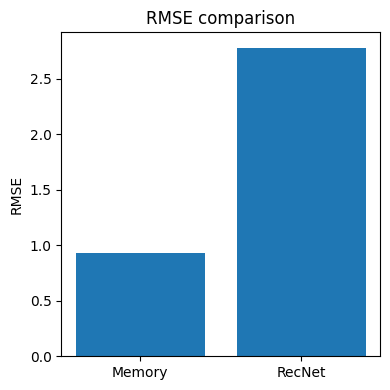

In [ ]:
rmse_mem = rmse_memory(get_recs_memory, cf_ratings)
rmse_nn  = rmse_nn(get_recs_nn)

print(f"Memory-based     RMSE: {rmse_mem:.3f}")
print(f"Recommender-Net  RMSE: {rmse_nn:.3f}")

# quick comparison bar chart
plt.figure(figsize=(4,4))
plt.bar(["Memory", "RecNet"], [rmse_mem, rmse_nn])
plt.ylabel("RMSE"); plt.title("RMSE comparison"); plt.tight_layout()
plt.show()

**RMSE Comparison – Memory-Based vs RecommenderNet**

Grafik di atas membandingkan performa dua model Collaborative Filtering berdasarkan nilai **Root Mean Squared Error (RMSE)**:

| Model              | RMSE     |
|-------------------|----------|
| Memory-Based       | **0.931** |
| RecommenderNet     | 2.781     |

**Interpretasi:**

- **Memory-Based Collaborative Filtering** memiliki performa yang jauh lebih baik berdasarkan metrik RMSE. Nilai 0.931 menunjukkan bahwa prediksi rating yang dihasilkan cukup dekat dengan rating aktual user.
- **RecommenderNet**, meskipun menggunakan pendekatan neural network yang lebih kompleks, menghasilkan RMSE yang lebih tinggi (2.781), yang mengindikasikan bahwa prediksi ratingnya masih cukup meleset dibandingkan dengan metode memory-based.

**Insight:**

- Performa RecommenderNet kemungkinan besar bisa ditingkatkan dengan:
  - Pelatihan yang lebih panjang (lebih banyak epoch)
  - Peningkatan arsitektur model (lebih dalam atau pakai regularisasi)
  - Normalisasi data rating (misalnya skala ke 0–1)
  - Penggunaan hyperparameter tuning (batch size, learning rate, embedding size)

Namun, untuk kondisi saat ini, **model Memory-Based menjadi pilihan yang lebih baik** dalam hal akurasi prediksi rating.

> Catatan: RMSE bukan satu-satunya metrik untuk evaluasi sistem rekomendasi — metrik seperti Precision@K dan Recall@K juga penting untuk mengukur relevansi rekomendasi secara langsung.


## **Recommendation Result**

Setelah seluruh model dibangun, dikomputasi, dan dievaluasi, tahap selanjutnya adalah menghasilkan **rekomendasi film Top-N** untuk pengguna. Rekomendasi ini dihasilkan dari dua pendekatan utama:

1. **Content-Based Filtering Recommendation**  
   Memberikan rekomendasi berdasarkan kesamaan konten film (judul, genre, keywords) dengan film yang disukai oleh user.

2. **Collaborative Filtering Recommendation**  
   Memberikan rekomendasi personalized berdasarkan pola interaksi user terhadap film, baik menggunakan kemiripan antar item (memory-based) maupun representasi laten user-item (RecommenderNet).

Output dari masing-masing pendekatan berupa daftar **Top-N film** yang disarankan untuk user tertentu, disertai dengan skor kemiripan atau prediksi rating.

Rekomendasi ini dapat digunakan untuk mengevaluasi kualitas prediksi model secara kualitatif, serta melihat seberapa relevan film yang disarankan terhadap preferensi pengguna.


### **Content Based Filtering Recommendation**

Pada bagian ini, sistem akan memberikan **Top-N rekomendasi film** berdasarkan kemiripan konten dengan film yang menjadi referensi. Pendekatan yang digunakan adalah:

- **Model**: TF-IDF Vectorizer + Cosine Similarity
- **Input**: Judul film yang disukai user
- **Output**: Daftar film yang memiliki kemiripan konten tertinggi dengan film tersebut

Fungsi `recommend_cb()` digunakan untuk:
1. Mengambil film referensi berdasarkan judul input.
2. Menggunakan model content-based untuk mencari film yang mirip secara konten (judul, keyword, genre).
3. Mengembalikan rekomendasi Top-N film dengan skor similarity tertinggi, disertai informasi genre.

Contoh penggunaannya:
```python
recommend_cb("The Matrix")


In [ ]:
def recommend_cb(title, movies_df=cb_movies, model_fn=get_recs_tfidf, top_n=10):
    """
    Top-N movies recommendation based on content similarity.
    Model used: TF-IDF + Cosine Similarity.
    """
    try:
        recs = model_fn(title, top_n=top_n)
        recs = recs.merge(movies_df[["movieId", "genres"]], on="movieId", how="left")
        print(f"Rekomendasi berdasarkan film: '{title}'")
        return recs[["movieId", "title", "genres", "similarity"]]
    except Exception as e:
        print(f"Error: {e}")
        return pd.DataFrame()


In [ ]:
recommend_cb("The Matrix")

Rekomendasi berdasarkan film: 'The Matrix'


,movieId,title,genres,similarity
0,6365,The Matrix Reloaded,Adventure Action Thriller Science Fiction,0.359346
1,6934,The Matrix Revolutions,Adventure Action Thriller Science Fiction,0.290497
2,6537,Terminator 3: Rise of the Machines,Action Thriller Science Fiction,0.203484
3,741,Ghost in the Shell,Action Animation Science Fiction,0.192695
4,8644,"I, Robot",Action Science Fiction,0.184790
5,2672,The Thirteenth Floor,Thriller Science Fiction Mystery,0.173462
6,109187,The Zero Theorem,Drama Fantasy Science Fiction,0.162287
7,2105,Tron,Science Fiction Action Adventure,0.160722
8,68791,Terminator Salvation,Action Science Fiction Thriller,0.158750
9,2600,eXistenZ,Action Thriller Science Fiction Horror,0.154901


**Interpretation – Content-Based Recommendation (TF-IDF)**

Rekomendasi di atas dihasilkan oleh model Content-Based Filtering dengan pendekatan **TF-IDF + Cosine Similarity**, berdasarkan film referensi: **"The Matrix"**.

**Insight dari Rekomendasi:**

- Film-film yang direkomendasikan memiliki kemiripan genre yang kuat dengan *The Matrix*, yaitu dominasi elemen **Action**, **Thriller**, dan **Science Fiction**.
- Beberapa judul seperti:
  - *The Matrix Reloaded* dan *The Matrix Revolutions* — adalah sekuel langsung dari film aslinya, sehingga kemiripannya sangat tinggi secara konten.
  - *Terminator 3*, *I, Robot*, dan *Ghost in the Shell* — mengangkat tema futuristik, kecerdasan buatan, dan perlawanan terhadap sistem, selaras dengan nuansa *The Matrix*.
- Genre yang paling sering muncul di daftar adalah **Science Fiction**, menunjukkan bahwa model berhasil menangkap genre inti dari film referensi.

**Skor Similarity:**

- Skor tertinggi dicapai oleh *The Matrix Reloaded* (0.359), diikuti *The Matrix Revolutions* (0.290), yang masuk akal mengingat keterkaitannya dalam waralaba.
- Skor similarity menurun secara bertahap, menandakan model mampu memprioritaskan film dengan kesamaan konten lebih tinggi terlebih dahulu.

**Kesimpulan:**

Model berhasil memberikan rekomendasi yang **relevan secara tematik dan genre**, dan mampu mengenali hubungan konten baik eksplisit (franchise) maupun implisit (tema dan nuansa). Ini membuktikan bahwa pendekatan content-based dapat memberikan saran yang akurat meskipun hanya bermodal satu film sebagai referensi.


### **Collaborative Filtering Recommendation**

Pada bagian ini, sistem memberikan **Top-N rekomendasi film secara personalized** untuk user tertentu menggunakan pendekatan Collaborative Filtering berbasis memori (item-item).

Fungsi `recommend_cf()` bekerja dengan dua output utama:
1. **Top-N rekomendasi film** untuk user berdasarkan pola rating terhadap film serupa.
2. **Daftar film yang sebelumnya disukai user** (rating ≥ threshold), sebagai perbandingan relevansi.

Model yang digunakan:
- **Memory-Based Collaborative Filtering**
- Pendekatan item-item dengan cosine similarity antar film

Parameter yang digunakan:
- `user_id`: ID pengguna target
- `top_n`: jumlah film yang direkomendasikan
- `threshold`: batas minimal rating yang dianggap “disukai” user (default: 4.0)

Fungsi ini berguna untuk mengevaluasi apakah model berhasil memberikan rekomendasi yang sesuai dengan selera pengguna berdasarkan histori interaksinya.

Contoh penggunaannya:
```python
recommend_cf(user_id=45)


In [ ]:
def recommend_cf(user_id,
                 ratings_df=cf_ratings,
                 movies_df=cb_movies,
                 model_fn=get_recs_memory,
                 top_n=10,
                 threshold=4.0):
    """
    Top-N personalized movies recommendation based on User ID and compare it with movies
    that have been liked by user.
    - Model used: Collaborative Filtering Memory Based (item-item).
    - Output: Two DataFrame (Recommendation and high rating historical data)
    """
    try:
        # Top-N Recommendation
        recs = model_fn(user_id, top_n=top_n)
        recs = recs.merge(movies_df[["movieId", "genres"]], on="movieId", how="left")

        # Rated Movies by user ≥ threshold
        liked_df = (
            ratings_df[(ratings_df["userId"] == user_id) & (ratings_df["rating"] >= threshold)]
            .merge(movies_df[["movieId", "title", "genres"]], on="movieId", how="left")
            [["movieId", "title", "genres", "rating"]]
            .sort_values("rating", ascending=False)
            .head(top_n)
        )


        print(f"\nRekomendasi untuk user {user_id}:")
        display(recs[["movieId", "title", "genres", "score"]])

        print(f"\nFilm yang pernah dirating tinggi oleh user {user_id}:")
        display(liked_df[["movieId", "title", "genres", "rating"]])


    except Exception as e:
        print(f"⚠️ Error: {e}")
        return pd.DataFrame(), pd.DataFrame()


In [ ]:
recommend_cf(user_id=45)


Rekomendasi untuk user 45:


,movieId,title,genres,score
0,1252,Chinatown,Crime Drama Mystery Thriller,19.394881
1,2997,Being John Malkovich,Fantasy Drama Comedy,18.961508
2,1617,L.A. Confidential,Crime Drama Mystery Thriller,18.634464
3,908,North by Northwest,Mystery Thriller,18.420172
4,923,Citizen Kane,Mystery Drama,18.305990
5,2858,American Beauty,Drama,18.291699
6,912,Casablanca,Drama Romance,18.020795
7,111,Taxi Driver,Crime Drama,17.924403
8,1208,Apocalypse Now,Drama War,17.881439
9,3481,High Fidelity,Comedy Drama Romance Music,17.853777



Film yang pernah dirating tinggi oleh user 45:


,movieId,title,genres,rating
1,903,Vertigo,Mystery Romance Thriller,5.0
12,26151,Au Hasard Balthazar,Drama,5.0
11,7064,Beauty and the Beast,Drama Fantasy Romance,5.0
4,1673,Boogie Nights,Drama,4.5
3,1333,The Birds,Horror,4.5
8,3307,City Lights,Comedy Drama Romance,4.5
7,3160,Magnolia,Drama,4.5
5,1748,Dark City,Mystery Science Fiction,4.5
6,2692,Run Lola Run,Action Drama Thriller,4.5
2,1199,Brazil,Comedy Science Fiction,4.0


#### Interpretation – Collaborative Filtering Recommendation (Memory-Based)

Rekomendasi di atas dihasilkan oleh model Collaborative Filtering berbasis memori (item-item), untuk user dengan ID `45`.

##### 🎬 Preferensi User
Berdasarkan histori rating, user 45 menunjukkan ketertarikan kuat terhadap film dengan genre:
- **Drama**, **Mystery**, dan **Thriller**
- Beberapa elemen **Romance**, **Fantasy**, dan **Sci-Fi**
- Menyukai film-film klasik dan sinematik yang kuat secara naratif

Contoh film yang disukai:
- *Vertigo*, *Beauty and the Beast*, *Boogie Nights*, *Magnolia*, *City Lights*

##### Insight dari Rekomendasi
Model berhasil memberikan rekomendasi yang sangat **selaras dengan gaya dan selera film user**, seperti:
- *Chinatown*, *L.A. Confidential*, *Citizen Kane* — film klasik dengan genre **Mystery/Drama**
- *Being John Malkovich*, *High Fidelity* — film dengan **narasi unik dan psikologis**
- *Casablanca*, *American Beauty*, *Apocalypse Now* — termasuk film **ikonik dan award-winning** dengan kedalaman karakter

##### Skor Prediksi
- Skor tertinggi mencapai **19.39**, menandakan model memiliki kepercayaan tinggi terhadap kecocokan film tersebut dengan user.
- Seluruh rekomendasi berada pada rentang skor tinggi, menunjukkan konsistensi model dalam mengenali pola preferensi user dari histori rating-nya.

##### Kesimpulan
Model Collaborative Filtering berbasis memori berhasil memberikan rekomendasi yang:
- **Personalized dan relevan secara tematik**
- Selaras dengan gaya sinematik user yang cenderung **klasik, emosional, dan naratif**
- Mampu mengenali selera user tanpa perlu mengetahui isi konten film secara eksplisit

Rekomendasi seperti ini sangat cocok untuk user aktif dengan riwayat interaksi yang cukup kaya, dan bisa meningkatkan kepuasan dalam eksplorasi film serupa.


## **Conclusion**

Pada proyek ini, kita telah berhasil membangun dan mengevaluasi dua pendekatan utama dalam sistem rekomendasi film:

---

1. **Content-Based Filtering (CBF)**  
CBF menggunakan informasi konten dari film seperti **judul**, **keywords**, dan **genre** untuk menghitung kemiripan antar film. Model ini sangat efektif digunakan saat data interaksi user masih terbatas (cold-start problem).  
Dua varian model yang dibangun:
- **TF-IDF + Cosine Similarity** — menangkap bobot penting kata
- **CountVectorizer + Cosine Similarity** — menghitung frekuensi kata

> 🔎 *Hasil evaluasi menunjukkan bahwa TF-IDF + Cosine Similarity mampu merekomendasikan film yang relevan secara tematik dengan preferensi user.*

---

2. **Collaborative Filtering (CF)**  
CF memberikan rekomendasi berdasarkan pola interaksi user dengan film. Pendekatan ini menghasilkan rekomendasi personalized yang lebih tajam seiring bertambahnya data rating.
Model yang dibangun:
- **Memory-Based CF** — menggunakan cosine similarity antar item
- **RecommenderNet** — neural network sederhana berbasis embedding

> *Hasil evaluasi menunjukkan bahwa model Memory-Based memberikan performa RMSE yang lebih baik dibandingkan RecommenderNet dalam kondisi saat ini. Namun, RecommenderNet memiliki potensi untuk dikembangkan lebih lanjut.*

---

**Final Insight**

- **CBF cocok untuk user baru**, karena tidak membutuhkan histori rating.
- **CF cocok untuk user aktif**, karena dapat memberikan rekomendasi yang lebih personal.
- Kombinasi keduanya dapat menjadi fondasi untuk **hybrid recommendation system** di masa depan.

Tahap selanjutnya dari proyek ini dapat mencakup:
- Evaluasi tambahan menggunakan **Precision@K**, **Recall@K**, dan **MAP**
- Eksplorasi **Hybrid Filtering**
- Penerapan sistem dalam bentuk API atau aplikasi interaktif

Sistem rekomendasi yang telah dibangun membuktikan bahwa pendekatan machine learning dapat secara efektif membantu user menemukan film yang sesuai dengan preferensi mereka.
